Normal Distribution

In [ ]:
import pandas as pd
import numpy as np
import warnings

# Setting precision level to 4 to show only upto 4 decimal points
pd.option_context('display.precision', 2)

beml_df = pd.read_csv( 'BEML.csv' )
beml_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [ ]:
glaxo_df = pd.read_csv( 'GLAXO.csv' )
glaxo_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [ ]:
#Selecting Date and close colun, as the analysis need only these
beml_df = beml_df[['Date', 'Close']]
glaxo_df = glaxo_df[['Date', 'Close']]

In [ ]:
# Converting date into index
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']) )
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']) )


In [ ]:
glaxo_df.head(5)

,Date,Close
Date,,
2010-01-04,2010-01-04,1625.65
2010-01-05,2010-01-05,1616.80
2010-01-06,2010-01-06,1638.50
2010-01-07,2010-01-07,1648.70
2010-01-08,2010-01-08,1639.80


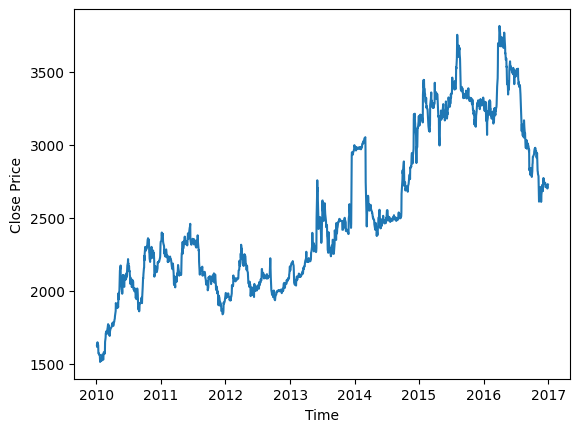

In [ ]:
# Plotting the trend od CLOSE prices of Glaxo stock
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

plt.plot( glaxo_df.Close );
plt.xlabel( 'Time' );
plt.ylabel( 'Close Price' );

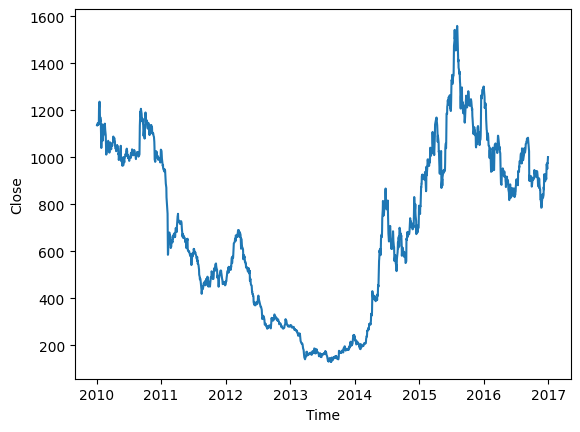

In [ ]:
# Plotting the trend od CLOSE prices of BEML stock
plt.plot( beml_df.Close );
plt.xlabel( 'Time' );
plt.ylabel( 'Close' );

In [ ]:
#Calculating gain
glaxo_df['gain'] = glaxo_df.Close.pct_change( periods = 1 )
beml_df['gain'] = beml_df.Close.pct_change( periods = 1 )
glaxo_df.head( 5 )

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1625.65,NaN
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398


In [ ]:
#Try to remove NaN
glaxo_df = glaxo_df.dropna()
beml_df = beml_df.dropna()
glaxo_df.head( 5 )

,Date,Close,gain
Date,,,
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
2010-01-11,2010-01-11,1629.45,-0.006312


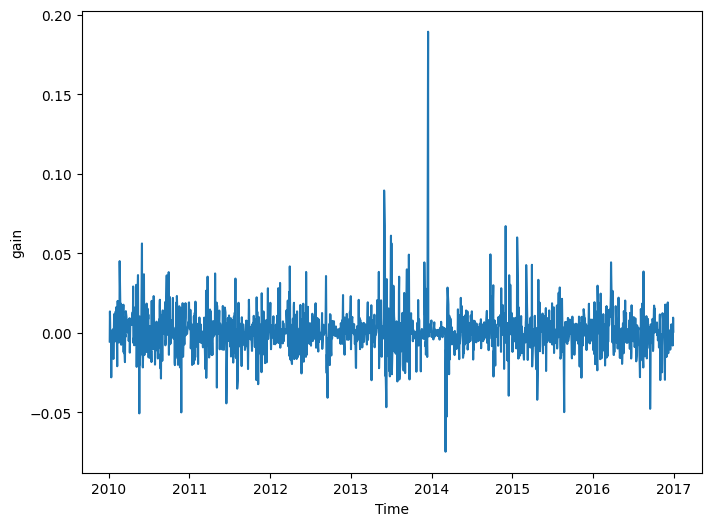

In [ ]:
#Plotting Gain vs time
plt.figure( figsize = ( 8, 6 ));
plt.plot( glaxo_df.index, glaxo_df.gain  );
plt.xlabel( 'Time' );
plt.ylabel( 'gain' );

<ipython-input-13-6709b6eb9e08>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot( glaxo_df.gain, label = 'Glaxo'  );
<ipython-input-13-6709b6eb9e08>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot( beml_df.gain, label = 'BEML'  );


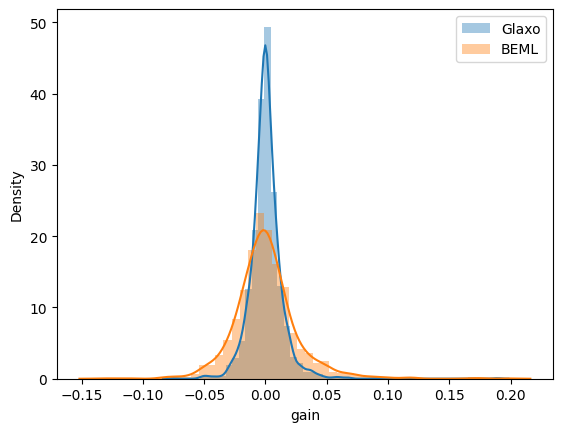

In [ ]:
#Normal distribution plot of both stock
sn.distplot( glaxo_df.gain, label = 'Glaxo'  );
sn.distplot( beml_df.gain, label = 'BEML'  );
plt.xlabel( 'gain' );
plt.ylabel( 'Density' );
plt.legend();

In [ ]:
#Cal mean and SD of both stock
#a)Glaxo
print( "Daily gain of Glaxo")
print("---------------------")
print( "Mean: ", round(glaxo_df.gain.mean(), 4) )
print( "Standard Deviation: ", round(glaxo_df.gain.std(), 4) )

Daily gain of Glaxo
---------------------
Mean:  0.0004
Standard Deviation:  0.0134


In [ ]:
#Cal mean and SD of both stock
#b)BEML
print( "Daily gain of BEML")
print("---------------------")
print( "Mean: ", round(beml_df.gain.mean(), 4) )
print( "Standard Deviation: ", round(beml_df.gain.std(), 4) )

Daily gain of BEML
---------------------
Mean:  0.0003
Standard Deviation:  0.0264


In [ ]:
#To get report of BEML
beml_df.gain.describe()

count    1738.000000
mean        0.000271
std         0.026431
min        -0.133940
25%        -0.013736
50%        -0.001541
75%         0.011985
max         0.198329
Name: gain, dtype: float64

In [ ]:
#To get report of Glaxo stock
glaxo_df.gain.describe()

count    1738.000000
mean        0.000386
std         0.013361
min        -0.074719
25%        -0.005850
50%        -0.000021
75%         0.005826
max         0.189196
Name: gain, dtype: float64

 Calculating gain using Confidence Interval

In [ ]:
#Gain with CI=95% of Glaxo stock
from scipy import stats

glaxo_df_ci = stats.norm.interval(0.95,
                                  loc = glaxo_df.gain.mean(),
                                  scale = glaxo_df.gain.std())

print( "Gain at 95% confidence interval is:", np.round(glaxo_df_ci, 4) )

Gain at 95% confidence interval is: [-0.0258  0.0266]


In [ ]:
#Gain with CI=95% of BEML stock
beml_df_ci = stats.norm.interval( 0.95,
                loc=beml_df.gain.mean(),
                scale=beml_df.gain.std())

print( "Gain at 95% confidence interval is:", np.round(beml_df_ci, 4) )

Gain at 95% confidence interval is: [-0.0515  0.0521]


Normal distribution with Cumulative Probability Distribution:
It is area under pdf upto x=a

In [ ]:
# Probability of making 2% Gain or higher in Glaxo
print( "Probability of making 2% Gaik or higher in Glaxo: ")
stats.norm.cdf( -0.02,
             loc=glaxo_df.gain.mean(),
             scale=glaxo_df.gain.std())

Probability of making 2% loss or higher in Glaxo: 


0.06352488667177401

In [ ]:
#Probability of making 2% Gain or higher in BEML
print( "Probability of making 2% Gain or higher in BEML: ")
stats.norm.cdf( -0.02,
             loc=beml_df.gain.mean(),
             scale=beml_df.gain.std())

Probability of making 2% loss or higher in BEML: 


0.22155987503755292